#실험 3 결과보고서

***

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as opt

#google drive에 mount
from google.colab import drive
drive.mount('/content/drive')

# Seed 고정
torch.manual_seed(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#x_train 값 설정
x_train = torch.FloatTensor([[1],[2],[3]])
#y_train 값 설정
y_train = torch.FloatTensor([[1],[2],[3]])

#x_train 출력
print(x_train)
#x_train의 shape 출력
print(x_train.shape)
#y_train 출력
print(y_train)
#y_train의 shape 출력
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [5]:
#x_train, y_train의 shap에 따라 input,output을 (1,1)로 linear regression함
model = nn.Linear(1,1)

#y_hypo를 linear regression model에 의한 값으로 설정
y_hypo = model(x_train)
#parameters 출력
print(list(model.parameters()))
#y_hypo 출력
print(y_hypo)

#cost를 mse로 설정
cost = func.mse_loss(y_hypo,y_train)
#cost 출력
print(cost)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)
tensor(2.1471, grad_fn=<MseLossBackward0>)


In [6]:
#learnig rate 를 0.01로 설정
optimizer = opt.SGD(model.parameters(), lr=0.01)

In [7]:
#gradient descent를 1000번 반복
for epoch in range(1000):

  #y_hypo 및 cost 설정
  y_hypo = model(x_train)
  cost = func.mse_loss(y_hypo, y_train)

  #기울기의 값을 초기화
  optimizer.zero_grad()
  #함수에서의 기울기 값을 계산
  cost.backward()
  #위에서 구한 기울기 값을 통해 매개변수 값을 이동
  optimizer.step()

  #100번 마다 1번씩 반복
  if epoch % 100 == 99:

    #parameter에서의 w,b 값을 할당
    params = list(model.parameters())
    w = params[0].item()
    b = params[1].item()

    #100번 마다 w,b 및 cost를 출력
    print('Epoch {:4d}/{} w: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch+1, 1000, w, b, cost.item()
    ))

Epoch  100/1000 w: 1.066 b: -0.150 Cost: 0.003255
Epoch  200/1000 w: 1.052 b: -0.118 Cost: 0.002011
Epoch  300/1000 w: 1.041 b: -0.093 Cost: 0.001243
Epoch  400/1000 w: 1.032 b: -0.073 Cost: 0.000768
Epoch  500/1000 w: 1.025 b: -0.057 Cost: 0.000475
Epoch  600/1000 w: 1.020 b: -0.045 Cost: 0.000293
Epoch  700/1000 w: 1.016 b: -0.035 Cost: 0.000181
Epoch  800/1000 w: 1.012 b: -0.028 Cost: 0.000112
Epoch  900/1000 w: 1.010 b: -0.022 Cost: 0.000069
Epoch 1000/1000 w: 1.008 b: -0.017 Cost: 0.000043


In [16]:
#data를 csv 파일에서 가져옴
dataset = np.loadtxt(
    '/content/drive/MyDrive/Colab Notebooks/linear_regression.csv', 
    delimiter=',', 
    dtype=np.float32,encoding='utf-8-sig')

np.random.shuffle(dataset)

#크기가 (25,4) 인 sheet에서 값을 가져옴
#dataset[:,:-1]에 따라 x_train은 크기가 (25,3) 이 되고
x_train = torch.FloatTensor(dataset[:,:-1])
#dataset[:,[-1]]에 따라 y_train은 크기가 (25,1) 이 된다.
y_train = torch.FloatTensor(dataset[:,[-1]])

#따라서 input 값은 3, output 값은 1이 된다.
model = nn.Linear(3,1)

#leaning rate 값을 0.00001로 설정한다.
optimizer = opt.SGD(model.parameters(), lr=0.00001)

#gradient descent를 1000번 반복
for epoch in range(1000):
  
  #y_hypo 및 cost 설정
  y_hypo = model(x_train)
  cost = func.mse_loss(y_hypo, y_train)

  #gradient descent 실행
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번 마다 cost 출력, 점점 작아지는 것을 확인
  if epoch % 100 == 99:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch+1, 1000, cost.item()))

#최종적으로 오차값 출력
print(y_hypo-y_train)

Epoch  100/1000 Cost: 9.402589
Epoch  200/1000 Cost: 9.189513
Epoch  300/1000 Cost: 8.991280
Epoch  400/1000 Cost: 8.806793
Epoch  500/1000 Cost: 8.635040
Epoch  600/1000 Cost: 8.475046
Epoch  700/1000 Cost: 8.325992
Epoch  800/1000 Cost: 8.187043
Epoch  900/1000 Cost: 8.057479
Epoch 1000/1000 Cost: 7.936633
tensor([[ 0.1499],
        [ 2.4842],
        [-2.1534],
        [-0.6814],
        [ 3.7077],
        [ 2.0923],
        [ 2.5375],
        [-8.6077],
        [ 3.1404],
        [-1.0186],
        [ 1.0707],
        [ 1.7293],
        [-0.4852],
        [-3.5018],
        [-0.6414],
        [ 2.7881],
        [ 0.2758],
        [-0.7828],
        [ 0.8748],
        [-4.0402],
        [ 4.2662],
        [ 1.4142],
        [ 0.1024],
        [-3.8286],
        [ 0.3146]], grad_fn=<SubBackward0>)


In [20]:
#x_train, y_train 값 설정
x_train = torch.FloatTensor([[0,1],[1,1],[2,1],[3,1]])
y_train = torch.FloatTensor([[-1],[0.2],[0.9],[2.1]])

#x_train, y_train 에 따른 input, output 설저 미 bias addictive를 0으로 설정
model = nn.Linear(2,1,False)

#learnig rate = 0.02
optimizer = opt.SGD(model.parameters(), lr=0.02)

#1000번 x값을 움직이며 최소값을 탐색
for epoch in range(1000):

  #예측 y 값을 linear 함수에서 설정
  y_hypo = model(x_train)
  #cost를 MSE로 설정
  cost = func.mse_loss(y_hypo,y_train)

  #gradient descent 실행
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번마다 cost를 출력, 점점 감소되는 것을 확인 
  if epoch % 100 == 99:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch+1, 1000, cost.item()))

#w,b 값을 출력
print(list(model.parameters()))

#Pseudo Inverse를 이용한 풀이와 비교, 결과가 동일함 확인 할 수 있다.
print("Pseudo Inverse를 이용한 풀이")
pinv = torch.inverse(x_train.T.matmul(x_train)).matmul(x_train.T)
print(pinv)
x=pinv.matmul(y_train)
print(x)
#learnig rate가 0.01 일때 cost가 잘 줄어들지 않음을 확인
#learnig rate를 0.02로 수정후 보다 정확한 값을 얻을 수 있었음


Epoch  100/1000 Cost: 0.036314
Epoch  200/1000 Cost: 0.014674
Epoch  300/1000 Cost: 0.012698
Epoch  400/1000 Cost: 0.012518
Epoch  500/1000 Cost: 0.012502
Epoch  600/1000 Cost: 0.012500
Epoch  700/1000 Cost: 0.012500
Epoch  800/1000 Cost: 0.012500
Epoch  900/1000 Cost: 0.012500
Epoch 1000/1000 Cost: 0.012500
[Parameter containing:
tensor([[ 1.0000, -0.9500]], requires_grad=True)]
Pseudo Inverse를 이용한 풀이
tensor([[-0.3000, -0.1000,  0.1000,  0.3000],
        [ 0.7000,  0.4000,  0.1000, -0.2000]])
tensor([[ 1.0000],
        [-0.9500]])


tensor([[0.],
        [1.],
        [2.],
        [3.]])
[[ 0.  -1. ]
 [ 1.   0.2]
 [ 2.   0.9]
 [ 3.   2.1]]
tensor([[-0.9500],
        [ 0.0500],
        [ 1.0500],
        [ 2.0500]], grad_fn=<MmBackward0>)
tensor([[-1.0000],
        [ 0.2000],
        [ 0.9000],
        [ 2.1000]])
tensor([[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.]])


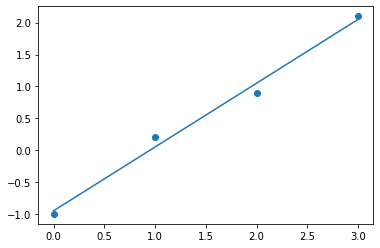

In [87]:
import matplotlib.pyplot as plt

data = [
    [0, -1],
    [1, 0.2],
    [2, 0.9],
    [3, 2.1]
]
data2 = [
    [0, -0.95],
    [1, 0.05],
    [2, 1.05],
    [3, 2.05]
]

data1=x_train[:,[0]]
print(data1)
data3=torch.cat([data1,y_hypo], dim = 1)
_data1 = x_train[:,[0]].numpy()
_data2 = y_train.numpy()
print(np.concatenate((_data1,_data2), axis=1))

print(y_hypo)
print(y_train)
print(x_train)
x, y = zip(*np.concatenate((_data1,_data2), axis=1))
x2, y2 = zip(*data2)
plt.scatter(x, y)
plt.plot(x2, y2)
plt.show()


In [62]:
dataset = np.loadtxt(
    '/content/drive/MyDrive/Colab Notebooks/data_logistic_regression.csv', 
    delimiter=',', 
    dtype=np.float32)